
# Machine Learning with Python

Welcome to the **Machine Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in machine learning. You will explore:

1. **Supervised Learning**
    - Regression algorithms
    - Classification algorithms
2. **Unsupervised Learning**
    - Clustering algorithms
    - Dimensionality reduction
3. **Fairness and Interpretability**
    - Interpretable methods
    - Bias evaluation
    
Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing machine learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---


## Part1.1: Supervised learning - Regression on a synthetic dataset
In this project, you will compare multiple regression model on synthetic dataset. The taks will include:  

1. **Import and Understand a Dataset**: Learn how to load, preprocess, and explore a dataset to prepare it for training.
2. **Train a regression model**: Select and train a regression model using scikit-learn.
3. **Evaluate and plot the model performance**: Select a criterion to which you can evaluate the model, and plot its result.
4. **Compare multiple regression model, and get the best performance**: Compare multiple models, and find the best model to fit the data.

By the end of this project, you'll have a solid understanding of the different regression methods.

---

## Dataset

This exercise will start by importing a simple 2D dataset. The dataset can be found in this repo under:  
 `part1_supervised_learning/1_regression/regression_dataset.arff`  

The code snippet below allows you to load the dataset.

In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff(open('regression_dataset.arff','r'))

data = [[float(x[0]),float(x[1])] for x in data[0]]
X = [row[0] for row in data]
y = [row[1] for row in data]


## Data visualisation

**Your job**:
- Print the first five samples of the dataset.
- Plot the dataset using matplotlib plt.scatter method.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

print("Premiers exemples :")
for i in range(5):
    print(f"X = {X[i]:.2f}, y = {y[i]:.2f}")

X: 67.1343, y: -2.2145
X: 86.3727, y: -8.6747
X: 52.7054, y: -0.0254
X: 57.9158, y: -0.1516
X: -83.9679, y: 8.2127


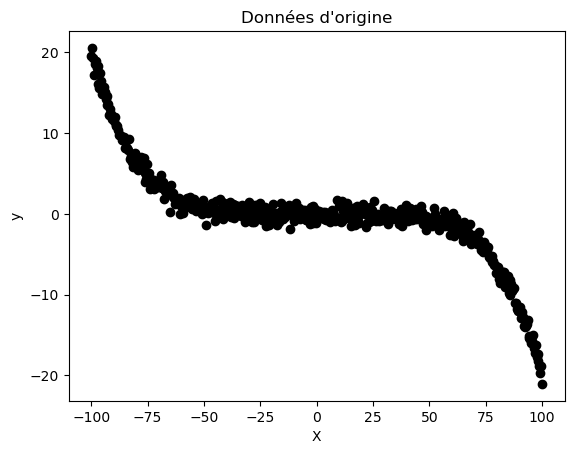

In [49]:
plt.figure()
plt.scatter(X, y, color='black')
plt.title("Données d'origine")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Data preparation

**Your job**:
- Normalise the dataset between [0,1] using **MinMaxScaler** (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
    - Normalization ensures that all features contribute equally by scaling them to a common range, preventing models from being biased toward features with larger values. It also helps gradient-based algorithms converge faster and improves overall model performance.
- Plot the normalised dataset using matplotlib.

In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# S'assurer que X et y sont des tableaux NumPy 2D
X_array = np.array(X).reshape(-1, 1)  # reshape vers (n_samples, 1)
y_array = np.array(y).reshape(-1, 1)

# Normalisation
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_array)
y_scaled = scaler_y.fit_transform(y_array)


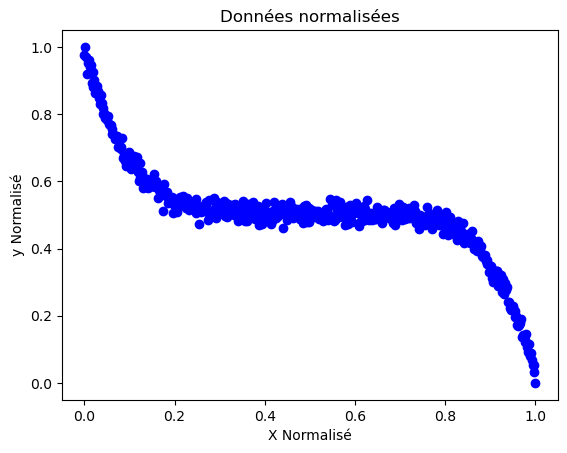

In [52]:
# Tracé des données normalisées
plt.figure()
plt.scatter(X_scaled, y_scaled, color='blue')
plt.title("Données normalisées")
plt.xlabel("X Normalisé")
plt.ylabel("y Normalisé")
plt.show()

## Training regression models

**Your job**:
- Using the sklearn library (https://scikit-learn.org/stable/supervised_learning.html):
    - Train a linear model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
    - Train a polynomial model (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).
- Print the prediction on the first 10 samples for the two models alongside the target value.

In [53]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Entraînement d'un modèle linéaire simple
model_lin = LinearRegression()
model_lin.fit(X_scaled, y_scaled)
y_pred_lin = model_lin.predict(X_scaled)


In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_scaled)
model_poly2 = LinearRegression()
model_poly2.fit(X_poly2, y_scaled)
y_pred_poly2 = model_poly2.predict(X_poly2)

## Evaluating regression models

**Your job**:
- Using sklearn metrics (https://scikit-learn.org/stable/api/sklearn.metrics.html):
    - Select at least two metrics.
    - Evaluate your trained models on these metrics.
    - Compare and conclude about the performance of the models.


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\nÉvaluation des modèles de base")
def eval_model(name, y_true, y_pred):
    print(f"{name} => MSE: {mean_squared_error(y_true, y_pred):.5f}, MAE: {mean_absolute_error(y_true, y_pred):.5f}")

eval_model("Régression Linéaire", y_scaled, y_pred_lin)
eval_model("Régression Poly (deg 2)", y_scaled, y_pred_poly2)



Évaluation des modèles de base
Régression Linéaire => MSE: 0.00725, MAE: 0.06809
Régression Poly (deg 2) => MSE: 0.00725, MAE: 0.06809


## Improve regression 

**Your job**:
- Modify the regression models and parameters.
    - Train at least **three** more models.
- Apply the pipeline created before.
- Try to achieve the best performance with the lightest model.
- Display your different architectures.

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Pipeline C : PolynomialFeatures(degree=4) + LinearRegression
pipeline_C = make_pipeline(PolynomialFeatures(degree=4),LinearRegression() )

pipeline_C.fit(X_scaled, y_scaled)
y_pred_C = pipeline_C.predict(X_scaled)


In [65]:
# Pipeline D : PolynomialFeatures(degree=3) + Ridge
pipeline_D = make_pipeline(PolynomialFeatures(degree=3), Ridge(alpha=0.1, max_iter=10000))
pipeline_D.fit(X_scaled, y_scaled)
y_pred_D = pipeline_C.predict(X_scaled)

In [71]:
from sklearn.svm import SVR
# Modèle SVR
model_svr = SVR(kernel='rbf', C=100, gamma=0.1)
model_svr.fit(X_scaled, y_scaled.ravel())
y_pred_svr = model_svr.predict(X_scaled)

In [66]:
print(pipeline_C)
print("MSE :", mean_squared_error(y_scaled, y_pred_C))
print("MAE :", mean_absolute_error(y_scaled, y_pred_C))

print(pipeline_D)
print("MSE :", mean_squared_error(y_scaled, y_pred_D))
print("MAE :", mean_absolute_error(y_scaled, y_pred_D))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])
MSE : 0.0006840136415756679
MAE : 0.02124003211230946
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=0.1, max_iter=10000))])
MSE : 0.0006840136415756679
MAE : 0.02124003211230946


In [75]:
eval_model("SVR (RBF kernel)", y_scaled, y_pred_svr)

SVR (RBF kernel) => MSE: 0.00669, MAE: 0.06898


## Plot regression models

**Your job**:
- On the same plot:
    - Plot the dataset using plt.scatter.
    - Plot at least three regression line using plt.plot.
- *Don't forget to add a legend, axis names and title.*

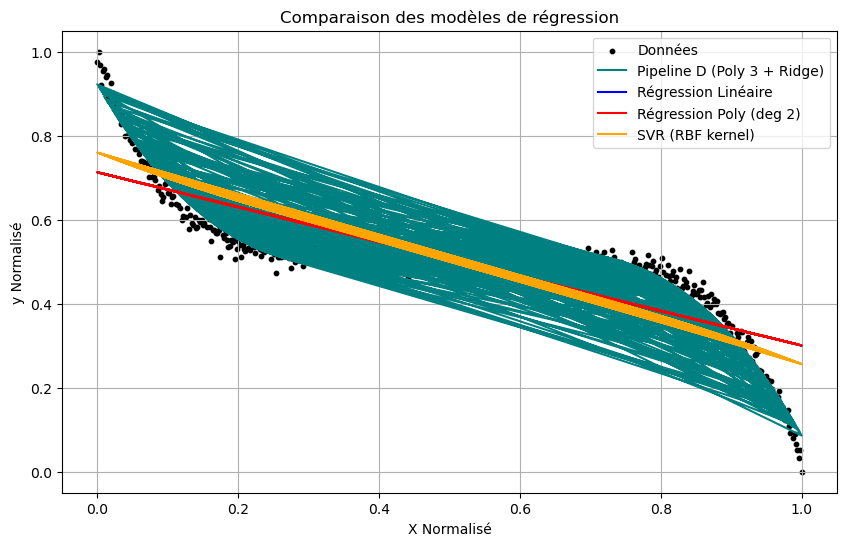

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='black', s=10, label='Données')
#plt.plot(X_scaled, y_pred_C, color='purple', label='Pipeline C (Poly 4 + LR)')
plt.plot(X_scaled, y_pred_D, color='teal', label='Pipeline D (Poly 3 + Ridge)')
plt.plot(X_scaled, y_pred_lin, color='blue', label='Régression Linéaire')
plt.plot(X_scaled, y_pred_poly2, color='red', label='Régression Poly (deg 2)')
plt.plot(X_scaled, y_pred_svr, color='orange', label='SVR (RBF kernel)')
plt.title("Comparaison des modèles de régression")
plt.xlabel("X Normalisé")
plt.ylabel("y Normalisé")
plt.legend()
plt.grid(True)
plt.show()
